# Predicting The Likelihood Of E-Signing A Loan. Based on Financial History

Lending companies work by analyzing the financial history of their  loan applicants, and choosing wheather or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/apps, often with the help of advertisement campaigns. Other times, lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to aquire leads of possible applicants. Some example market place include **Upstart, Lending Tree and Lending Club**. In this project, we are going to asses the '`quality`' of the leads our company receives from the marketplaces.
* **Market**: The target audience is the set of loan applicants who reached out through an intermediary marketplace.
* **Product**: A loan.
* **Goal**: Develop an model to predict for `quality` applicants. In this case study, `quality` applicants are those who reach a key part of the loan application process.

* In this case study we will be working for a fintech company that specializes on loans. It offers low APR loans to applicants based on their financial habits, as almost all lending companies do. This company has partnered with a P2P lending marketplace that provides real-time leads (loan applicants). The numbers of conversions from these leads are satisfactory.
* The company tasks you with creating a model that predicts whether or not these leads will complete the electronic signature phase of the loan applicants. The comapny seeks to leverage this model to identify less `quality` applicants and experiment with giving them different onbording screens.

## Importing the data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Financial-Data.csv")

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
df.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

Thank! God No NULL'S

In [6]:
df.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## EDA

In [7]:
df2=df.drop(columns=["entry_id", 'pay_schedule','e_signed'])

In [8]:
df2.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,40,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10
1,61,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
2,23,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
3,40,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
4,33,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12


In [13]:
df2.shape

(17908, 18)

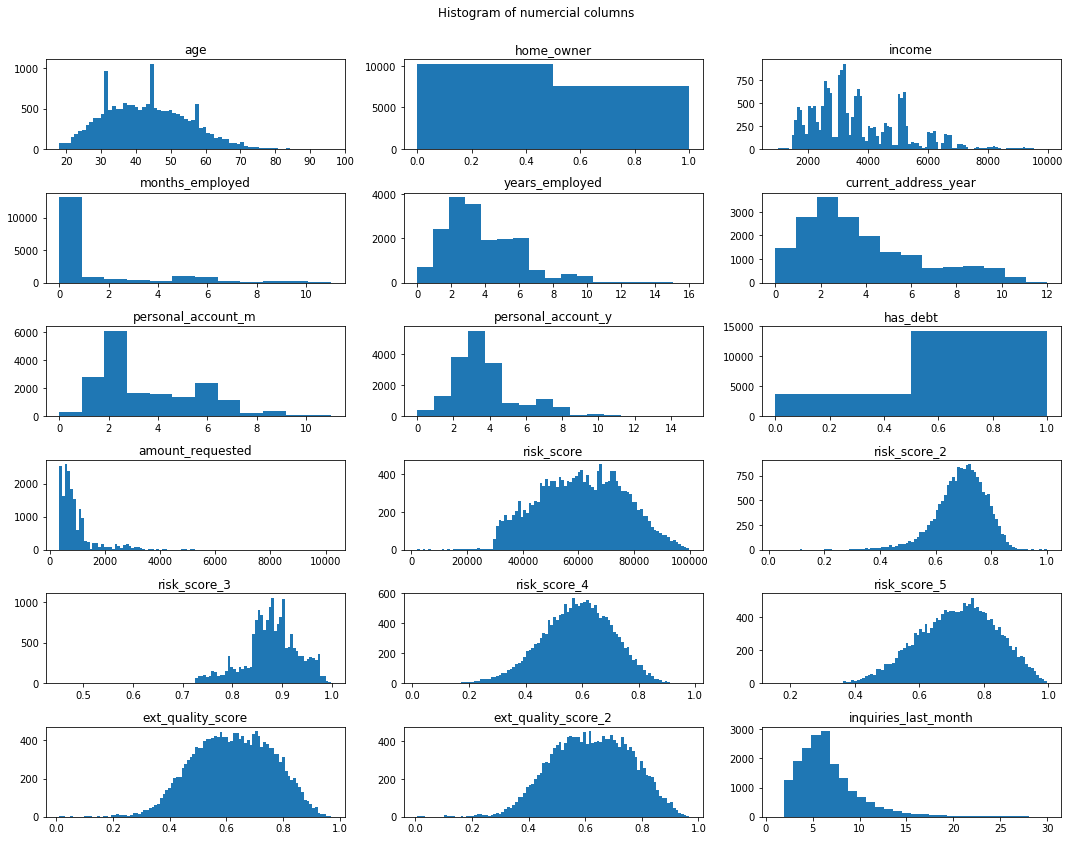

In [11]:
fig=plt.figure(figsize=(15,12))
plt.suptitle("Histogram of numercial columns")

for i in range(df2.shape[1]):
    plt.subplot(6,3,i+1)
    f=plt.gca()
    f.set_title(df2.columns.values[i])
    
    vals=np.size(df2.iloc[:,i].unique())
    if vals >= 100:
        vals=100
    
    plt.hist(df2.iloc[:,i],bins=vals)
plt.tight_layout(rect=[0,0.01,1,0.95])

## Correlation Plot

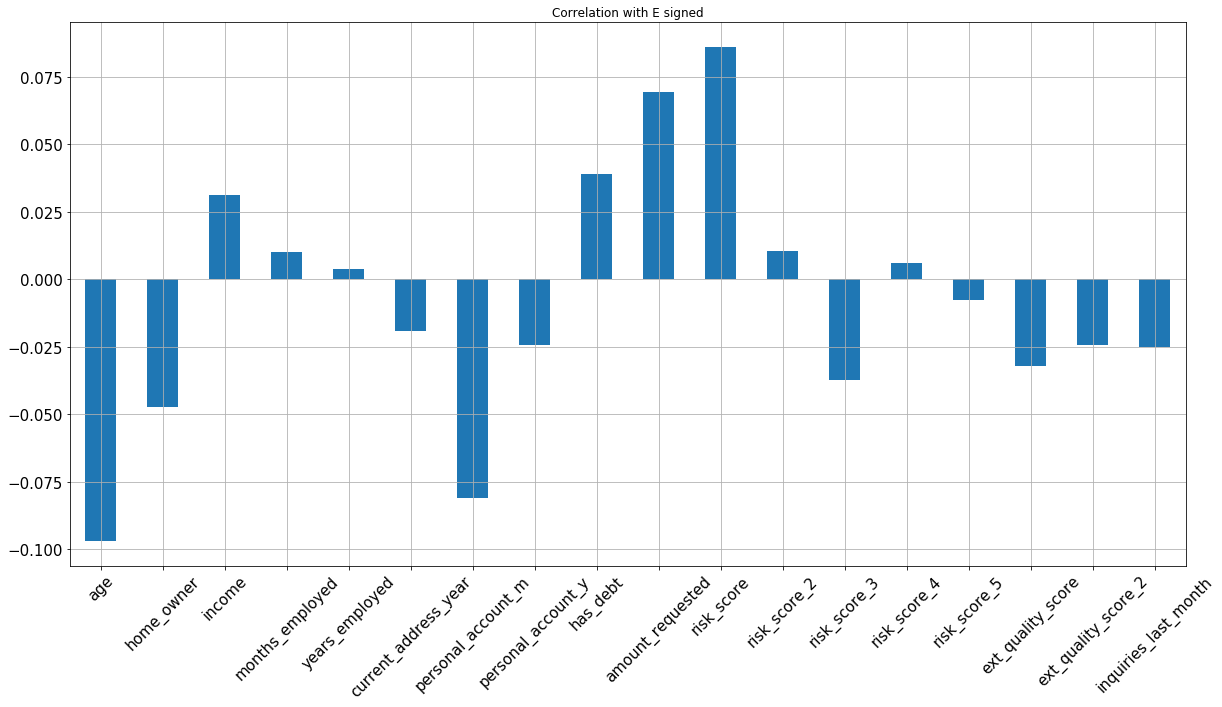

In [15]:
df2.corrwith(df.e_signed).plot.bar(
figsize=(20,10), title='Correlation with E signed', fontsize=15, rot=45,grid=True)

## Corelation matrix

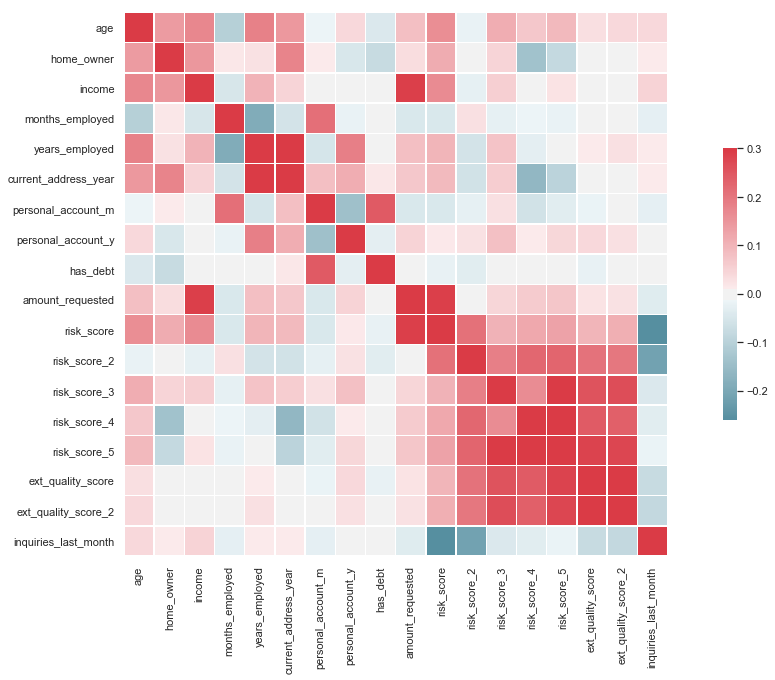

In [21]:
sns.set(style="white")

corr=df2.corr()

plt.figure(figsize=(20,10))
# sns.heatmap(corr,annot=True)
# mask=np.zeros_like(corr,dtype=np.bool)
# mask[np.tril_indices_from(mask)]=True

# f,ax=plt.subplots(figsize=(18,15))

# cmap=sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,cmap=cmap,vmax=.3,center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

## Feature Engineering

In [22]:
df=df.drop(columns=["months_employed"])

In [23]:
df["personal_account_months"]=(df.personal_account_m+(df.personal_account_y*12))

In [25]:
df[["personal_account_m","personal_account_y","personal_account_months"]].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [26]:
df=df.drop(columns=["personal_account_m","personal_account_y"])

In [27]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


## One-Hot encoding

In [28]:
df=pd.get_dummies(df)

In [29]:
df.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [31]:
df=df.drop(columns=["pay_schedule_semi-monthly"])

In [33]:
df.head()

,entry_id,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,7629673,40,1,3135,3,3,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,30,1,0,0
1,3560428,61,0,3180,6,3,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,86,0,0,1
2,6934997,23,0,1540,0,0,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,19,0,0,1
3,5682812,40,0,5230,6,1,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,86,1,0,0
4,5335819,33,0,3590,5,2,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,98,0,0,0


## Removing Extra Columns

In [34]:
response=df["e_signed"]
users=df["entry_id"]
df=df.drop(columns=["e_signed","entry_id"])

In [35]:
df.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
0,40,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,30,1,0,0
1,61,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,86,0,0,1
2,23,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,19,0,0,1
3,40,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,86,1,0,0
4,33,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,98,0,0,0


## Splitting the data

In [36]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test,y_train, y_test=train_test_split(df,response,test_size=0.2,random_state=2121)

## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc_X=StandardScaler()

In [46]:
X_train2=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns.values,index=X_train.index.values)
X_test2=pd.DataFrame(sc_X.fit_transform(X_test),columns=X_test.columns.values,index=X_test.index.values)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [47]:
X_test2.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
3229,-0.001324,-0.847827,-0.348198,-1.564511,-0.946657,0.507231,-0.650187,1.331846,0.964019,-0.514112,-1.201083,-0.705663,0.260334,-0.427490,0.140438,-0.145493,0.806654,-0.292326,-0.504184
14218,0.083360,1.179486,-0.006234,0.214420,1.938930,0.507231,0.219591,-1.054775,-1.518541,-0.471654,-1.470444,0.005754,-1.430454,-0.003970,0.961070,-1.288858,0.806654,-0.292326,-0.504184
7523,2.285154,1.179486,-0.029475,1.103886,-1.307355,0.507231,-0.070335,-0.114983,-1.123872,0.653904,0.007701,-0.439159,-0.156360,0.567229,-0.133106,0.426190,-1.239688,3.420837,-0.504184
16309,0.252729,1.179486,0.903456,0.214420,0.496136,-1.971488,-0.505224,1.984210,1.017045,-0.261444,0.962310,0.786964,0.574664,0.593925,0.140438,0.206312,0.806654,-0.292326,-0.504184
10894,2.200470,-0.847827,-0.607161,-0.230313,-0.585959,0.507231,-0.070335,0.634268,-2.179058,0.134208,-0.236100,-1.185027,-1.018318,1.115510,0.140438,0.338239,-1.239688,-0.292326,-0.504184


In [48]:
X_train=X_train2
X_test=X_test2

## Model Building

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
LR=LogisticRegression(random_state=0, penalty='l1')
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
y_pred=LR.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [114]:
df_models=pd.DataFrame([['Logistic Regression (lasso)',accuracy_score(y_test,y_pred),
                       precision_score(y_test,y_pred),recall_score(y_test,y_pred),
                       f1_score(y_test,y_pred)]],
                      columns=["Models","Accuracy","Precision","Recall","F1 Score"])

In [115]:
df_models

,Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.575098,0.57598,0.744456,0.64947


### SVM

In [116]:
from sklearn.svm import SVC

In [122]:
# SVC_model=SVC(random_state=0,kernel='linear')
SVC_model=SVC(random_state=0,kernel='rbf')

In [123]:
SVC_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [124]:
y_pred=SVC_model.predict(X_test)

In [125]:
df_models=df_models.append(pd.DataFrame([['SVM (rbf)',accuracy_score(y_test,y_pred),
                       precision_score(y_test,y_pred),recall_score(y_test,y_pred),
                       f1_score(y_test,y_pred)]],
                      columns=["Models","Accuracy","Precision","Recall","F1 Score"]),ignore_index=True)

In [126]:
df_models

,Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.575098,0.575980,0.744456,0.649470
1,SVM (linear),0.575377,0.574214,0.761880,0.654867
2,SVM (rbf),0.613345,0.611087,0.739176,0.669056


### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
RF_models=RandomForestClassifier(random_state=0,n_estimators=100,
                                criterion='entropy')
RF_models.fit(X_train,y_train)
y_pred=RF_models.predict(X_test)
df_models=df_models.append(pd.DataFrame([['Random Forest',accuracy_score(y_test,y_pred),
                       precision_score(y_test,y_pred),recall_score(y_test,y_pred),
                       f1_score(y_test,y_pred)]],
                      columns=["Models","Accuracy","Precision","Recall","F1 Score"]),ignore_index=True)

In [130]:
df_models

,Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.575098,0.575980,0.744456,0.649470
1,SVM (linear),0.575377,0.574214,0.761880,0.654867
2,SVM (rbf),0.613345,0.611087,0.739176,0.669056
3,Random Forest,0.634562,0.644302,0.689546,0.666157


### K-fold Cross Validation

In [132]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=RF_models,X=X_train,y=y_train,cv=10)

print(acc.mean())
print(acc.std()*2)

0.6295561740360801
0.016032728608576168


### Grid Search CV

In [133]:
parameters={"max_depth":[3,None],
           "max_features":[1,5,10],
           "min_samples_split":[2,5,10],
           "min_samples_leaf":[1,5,10],
           "bootstrap":[True,False],
           "criterion":["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RF_models,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=3)

In [138]:
import time

In [139]:
t2=time.time()
grid_search=grid_search.fit(X_train,y_train)
t1=time.time()
print("%0.2f"%(t1-t2))

2752.28


In [140]:
rf_best_accuracy=grid_search.best_score_

In [142]:
rf_best_parameters=grid_search.best_params_

In [143]:
rf_best_accuracy,rf_best_parameters

(0.6320675694541393,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [144]:
y_pred=grid_search.predict(X_test)
df_models=df_models.append(pd.DataFrame([['GridSearch CV + RF + entropy',accuracy_score(y_test,y_pred),
                       precision_score(y_test,y_pred),recall_score(y_test,y_pred),
                       f1_score(y_test,y_pred)]],
                      columns=["Models","Accuracy","Precision","Recall","F1 Score"]),ignore_index=True)

In [145]:
df_models

,Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.575098,0.575980,0.744456,0.649470
1,SVM (linear),0.575377,0.574214,0.761880,0.654867
2,SVM (rbf),0.613345,0.611087,0.739176,0.669056
3,Random Forest,0.634562,0.644302,0.689546,0.666157
4,GridSearch CV + RF + entropy,0.634003,0.643667,0.689546,0.665817


### Lets try with Gini

In [146]:
parameters={"max_depth":[3,None],
           "max_features":[1,5,10],
           "min_samples_split":[2,5,10],
           "min_samples_leaf":[1,5,10],
           "bootstrap":[True,False],
           "criterion":["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RF_models,param_grid=parameters,scoring="accuracy",cv=10,n_jobs=3)

In [147]:
grid_search=grid_search.fit(X_train,y_train)
y_pred=grid_search.predict(X_test)
df_models=df_models.append(pd.DataFrame([['GridSearch CV + RF + Gini',accuracy_score(y_test,y_pred),
                       precision_score(y_test,y_pred),recall_score(y_test,y_pred),
                       f1_score(y_test,y_pred)]],
                      columns=["Models","Accuracy","Precision","Recall","F1 Score"]),ignore_index=True)

In [148]:
df_models

,Models,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (lasso),0.575098,0.575980,0.744456,0.649470
1,SVM (linear),0.575377,0.574214,0.761880,0.654867
2,SVM (rbf),0.613345,0.611087,0.739176,0.669056
3,Random Forest,0.634562,0.644302,0.689546,0.666157
4,GridSearch CV + RF + entropy,0.634003,0.643667,0.689546,0.665817
5,GridSearch CV + RF + Gini,0.629257,0.638319,0.689546,0.662944


In [149]:
final_results=pd.concat([y_test,users],axis=1).dropna()
final_results["Predictions"]=y_pred
final_results=final_results[["entry_id","e_signed","Predictions"]]

In [150]:
final_results

,entry_id,e_signed,Predictions
3,5682812,1.0,0
9,8908605,1.0,0
10,8990111,0.0,0
18,8515555,1.0,0
27,4218775,1.0,0
29,1364529,0.0,1
34,3769730,1.0,1
42,2291906,0.0,0
43,4797409,1.0,0
52,2154744,1.0,0


Our model has given us an accuracy around 64% with this, we have an algorithm that can help predict whether or not a user will complete the E-signing step of the loan application. One way to leverage this model is to target those predicted to not reach the e-sign phase with customized onboarding. This means that when a lead arrives from the marketpalce, they may recieve a different onboarding experince based on how likely they are to finish the general onboarding process.This can help out company minimize how many people drop off from the funnel.This funnel of screens is as effective as we, as a company, built it. Therefore, user drop-off in this funnel falls entirely on our shoulders. So, with new onboarding screens built intentionally to lead users to finalize the loan application, we can attempt to get more than 40% of those predicted to not finish the process to complete the e-sign step. If we can do this, then we can drastically increase profits. Many lending comapnies provide hundreds of loans every day, gaining money for each one. As a result, if we can increase the number of loans takers, we are increasing profits. All with a simple model!.